In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [109]:
data=pd.read_csv('image_train.csv')
data=data.values

In [110]:
x_data=data[:,1:]
y_data=data[:,0]


In [111]:
x_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [112]:
y_data

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [113]:
split=int(0.8*x_data.shape[0])


In [114]:
x_train=x_data[:split,:]
y_train=y_data[:split]
x_test=x_data[split:,:]
y_test=y_data[split:]

In [115]:
def distance(x1,x2):
    return (np.sqrt(np.sum((x1-x2)**2)))

In [116]:
def knn(x_train,y_train,query_point,k=9):
    dist=[]
    for i in range(x_train.shape[0]):
        d=distance(x_train[i],query_point)
        dist.append((d,y_train[i]))
    dist=sorted(dist)
    dist=dist[:k]
    dist=np.array(dist)
    unique=np.unique(dist[:,1],return_counts=True)
    index=unique[1].argmax()
    pred=unique[0][index]
    return pred

In [117]:
def drawImage(sample):
    img=sample.reshape(28,28)
    plt.imshow(img,cmap='gray')
    plt.show()

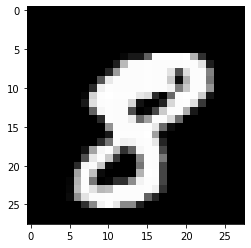

8


In [118]:
drawImage(x_train[10])
print(y_train[10])

In [119]:
pred=knn(x_train,y_train,x_test[41])

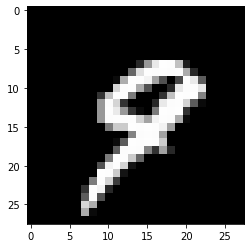

The predicted number is: 9.0


In [120]:
drawImage(x_test[41])
print('The predicted number is:', pred)

In [134]:
def accuracy(x_train,y_train,x_test,y_test):
    my_acc=[]
    my_pred=knn(x_train,y_train,x_test[:100,:])
    for i in range(x_test[:100,:].shape[0]):
        my_acc.append(my_pred[i]-y_test[:100,:])
        
        
        
    
    print('The accuracy of the prediction is:{} %'.format(my_acc))

In [ ]:
accuracy(x_train,y_train,x_test,y_test)